<a href="https://colab.research.google.com/github/poojabhateley/Outlet-Sales-Prediction/blob/master/Outlet_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, IsolationForest, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
dataset=pd.read_csv("/content/datasets_9961_14084_Train.csv")

In [6]:
dataset.shape

(8523, 12)

In [7]:
num_cols=[*dataset.select_dtypes('float64','int64').columns]
obj_cols=[*dataset.select_dtypes('object').columns]

In [8]:
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [9]:
#checking null values
dataset.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
# Imputation in Item_Weight by Interpolation

dataset['Item_Weight'].interpolate(inplace=True)

In [11]:
#Impute Outlet_Size missing values by mode

dataset['Outlet_Size'].fillna(dataset['Outlet_Size'].mode()[0],inplace=True)

In [12]:
dataset['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [13]:
dataset.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [14]:
#Replacing 0 Values in visibility column
dataset['Item_Visibility']=np.where(dataset['Item_Visibility']==0,np.nan,dataset['Item_Visibility'])
dataset['Item_Visibility']=dataset.groupby('Item_Type')['Item_Visibility'].transform(lambda x:x.fillna(np.mean(x)))


In [15]:
dataset.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.831222,0.070485,140.992782,1997.831867,2181.288914
std,4.445074,0.048744,62.275067,8.371760,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,9.000000,0.033085,93.826500,1987.000000,834.247400
50%,12.600000,0.061883,143.012800,1999.000000,1794.331000
75%,16.600000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [16]:
dataset['Age_of_company']=2020-dataset['Outlet_Establishment_Year']

In [17]:
#Dropping Year column

dataset.drop(['Outlet_Establishment_Year'],axis=1,inplace=True)

In [18]:
dataset['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [19]:
dataset['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'},inplace=True)

In [20]:
dataset['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [21]:
#Transforming Item_Identifier

dataset['Item_Identifier']=dataset['Item_Identifier'].str[:2]

In [22]:
dataset['Item_Type'].value_counts()/len(dataset)*100

Fruits and Vegetables    14.455004
Snack Foods              14.079549
Household                10.676992
Frozen Foods             10.043412
Dairy                     8.001877
Canned                    7.614690
Baking Goods              7.602957
Health and Hygiene        6.101138
Soft Drinks               5.221166
Meat                      4.986507
Breads                    2.944972
Hard Drinks               2.510853
Others                    1.982870
Starchy Foods             1.736478
Breakfast                 1.290625
Seafood                   0.750909
Name: Item_Type, dtype: float64

In [23]:
#Reducing the number of categories by replacing

dataset['Item_Type'].replace({'Soft Drinks':'Drinks','Hard Drinks':'Drinks','Meat':'Meat&Seafood',
                              'Seafood':'Meat&Seafood','Breads':'Others','Starchy Foods':'Others','Breakfast':'Others'},inplace=True)

In [24]:
dataset['Item_Type'].value_counts()/len(dataset)*100

Fruits and Vegetables    14.455004
Snack Foods              14.079549
Household                10.676992
Frozen Foods             10.043412
Dairy                     8.001877
Others                    7.954945
Drinks                    7.732019
Canned                    7.614690
Baking Goods              7.602957
Health and Hygiene        6.101138
Meat&Seafood              5.737416
Name: Item_Type, dtype: float64

In [25]:
#Correlation

dataset.corr()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Age_of_company
Item_Weight,1.000000,-0.017357,0.024839,0.014536,-0.001220
Item_Visibility,-0.017357,1.000000,-0.005279,-0.133745,0.078227
Item_MRP,0.024839,-0.005279,1.000000,0.567574,-0.005020
Item_Outlet_Sales,0.014536,-0.133745,0.567574,1.000000,0.049135
Age_of_company,-0.001220,0.078227,-0.005020,0.049135,1.000000


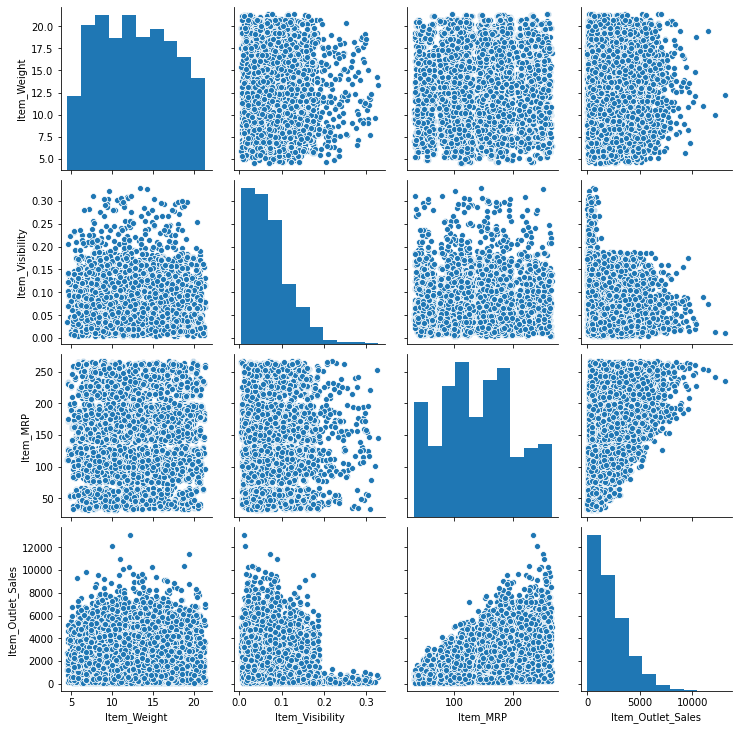

In [26]:
#Data Visualization
sns.pairplot(dataset[num_cols])

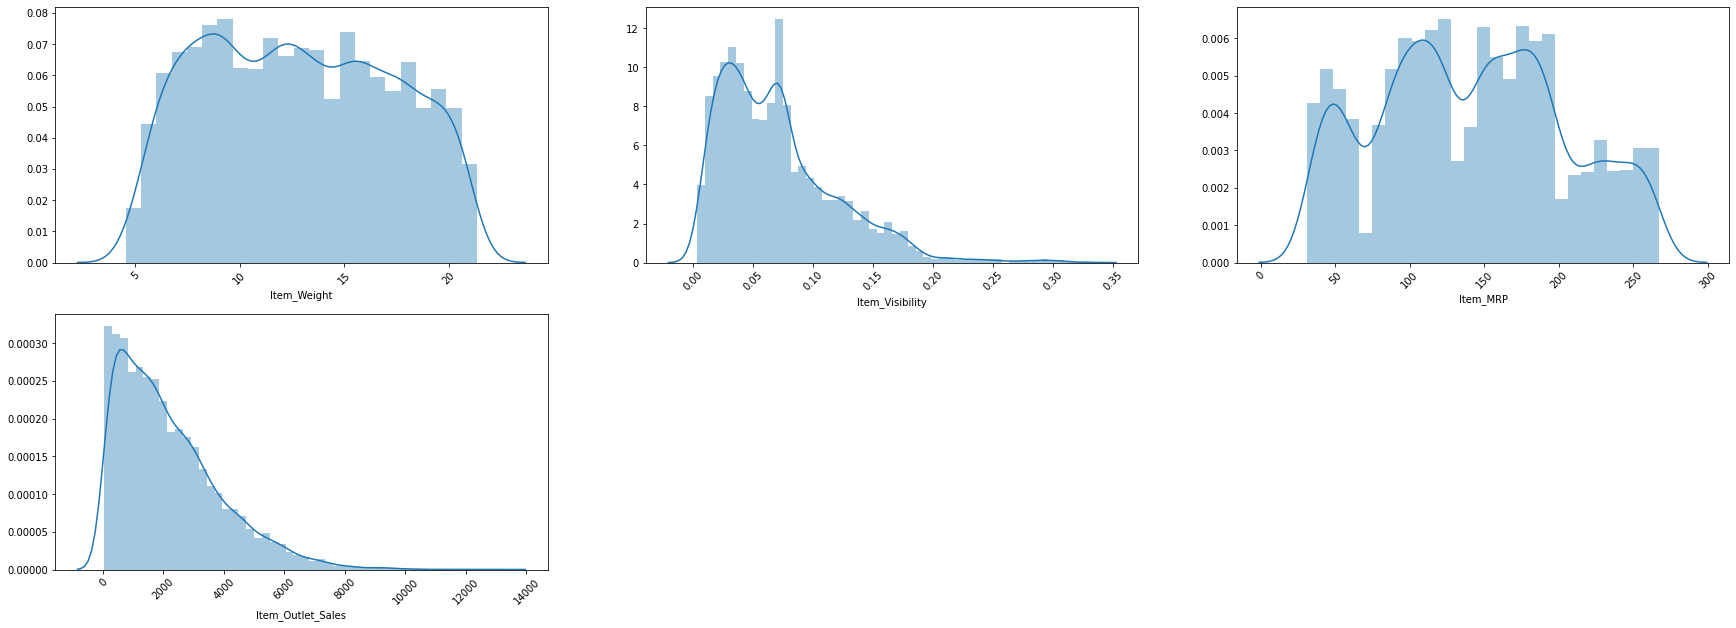

In [31]:
plt.figure(figsize=(30,16))
for i,name in enumerate(num_cols):
  plt.subplot(3,3,i+1)
  sns.distplot(dataset[name])
  plt.xticks(rotation=45)

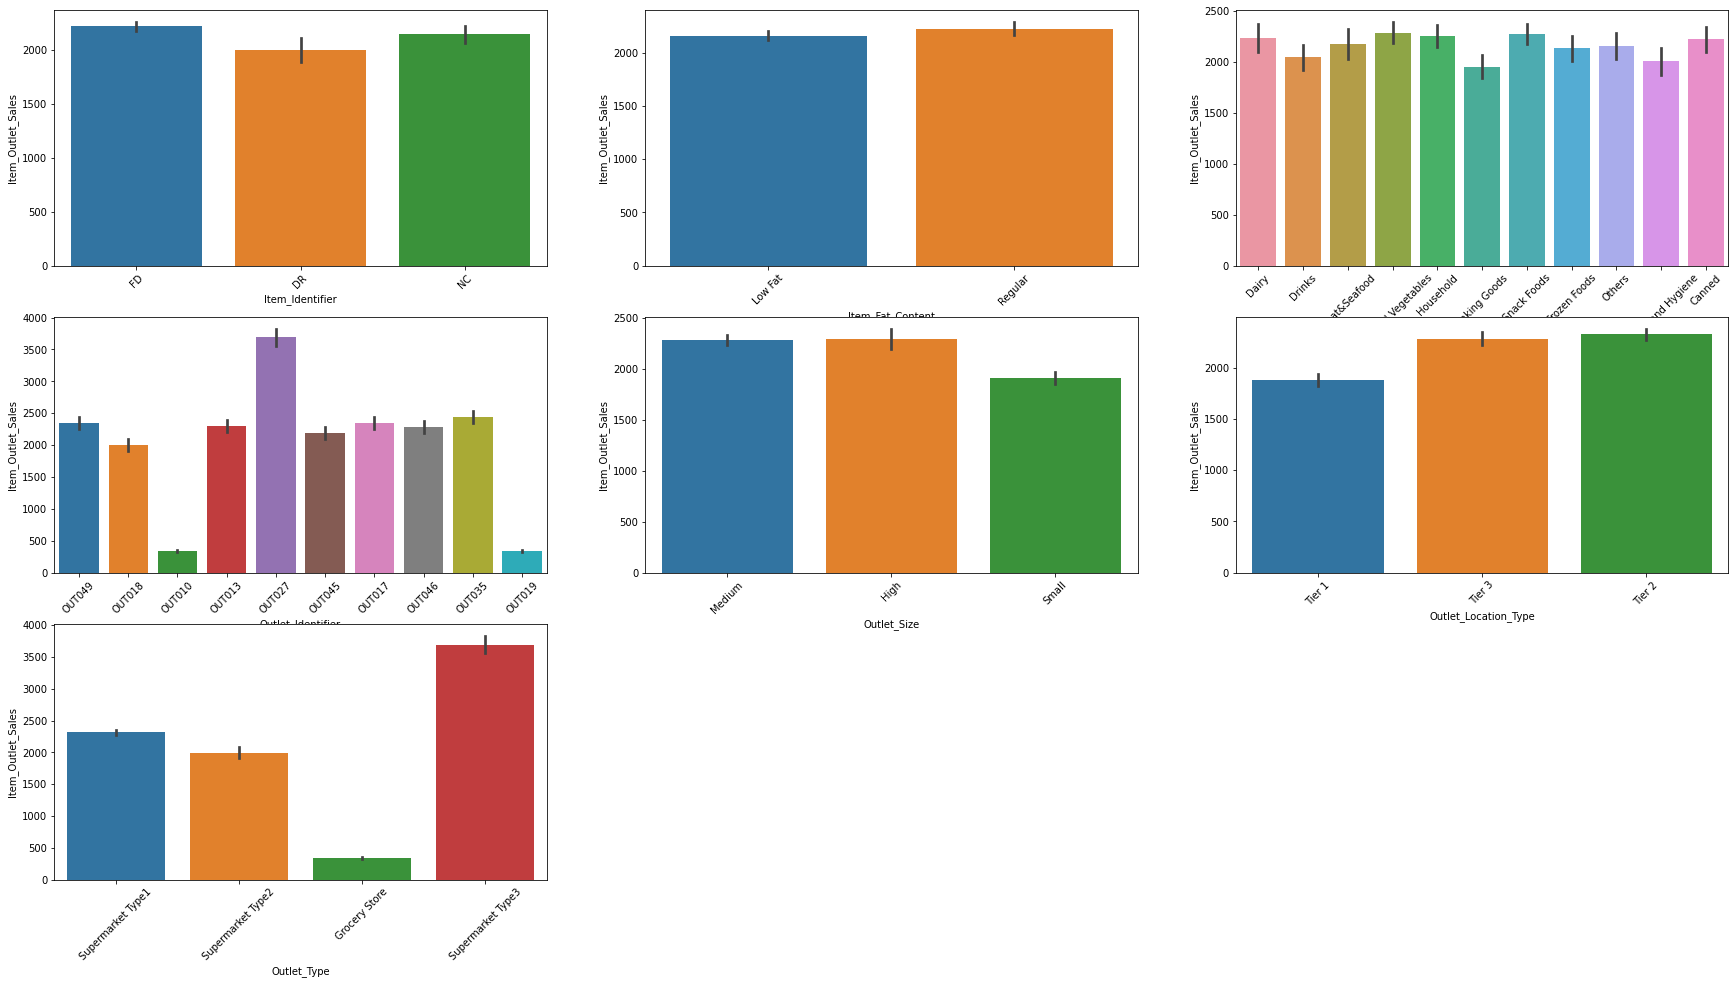

In [34]:

plt.figure(figsize=(30,16))
for i,name in enumerate(obj_cols):
  plt.subplot(3,3,i+1)
  sns.barplot(name,'Item_Outlet_Sales',data=dataset)
  plt.xticks(rotation=45)

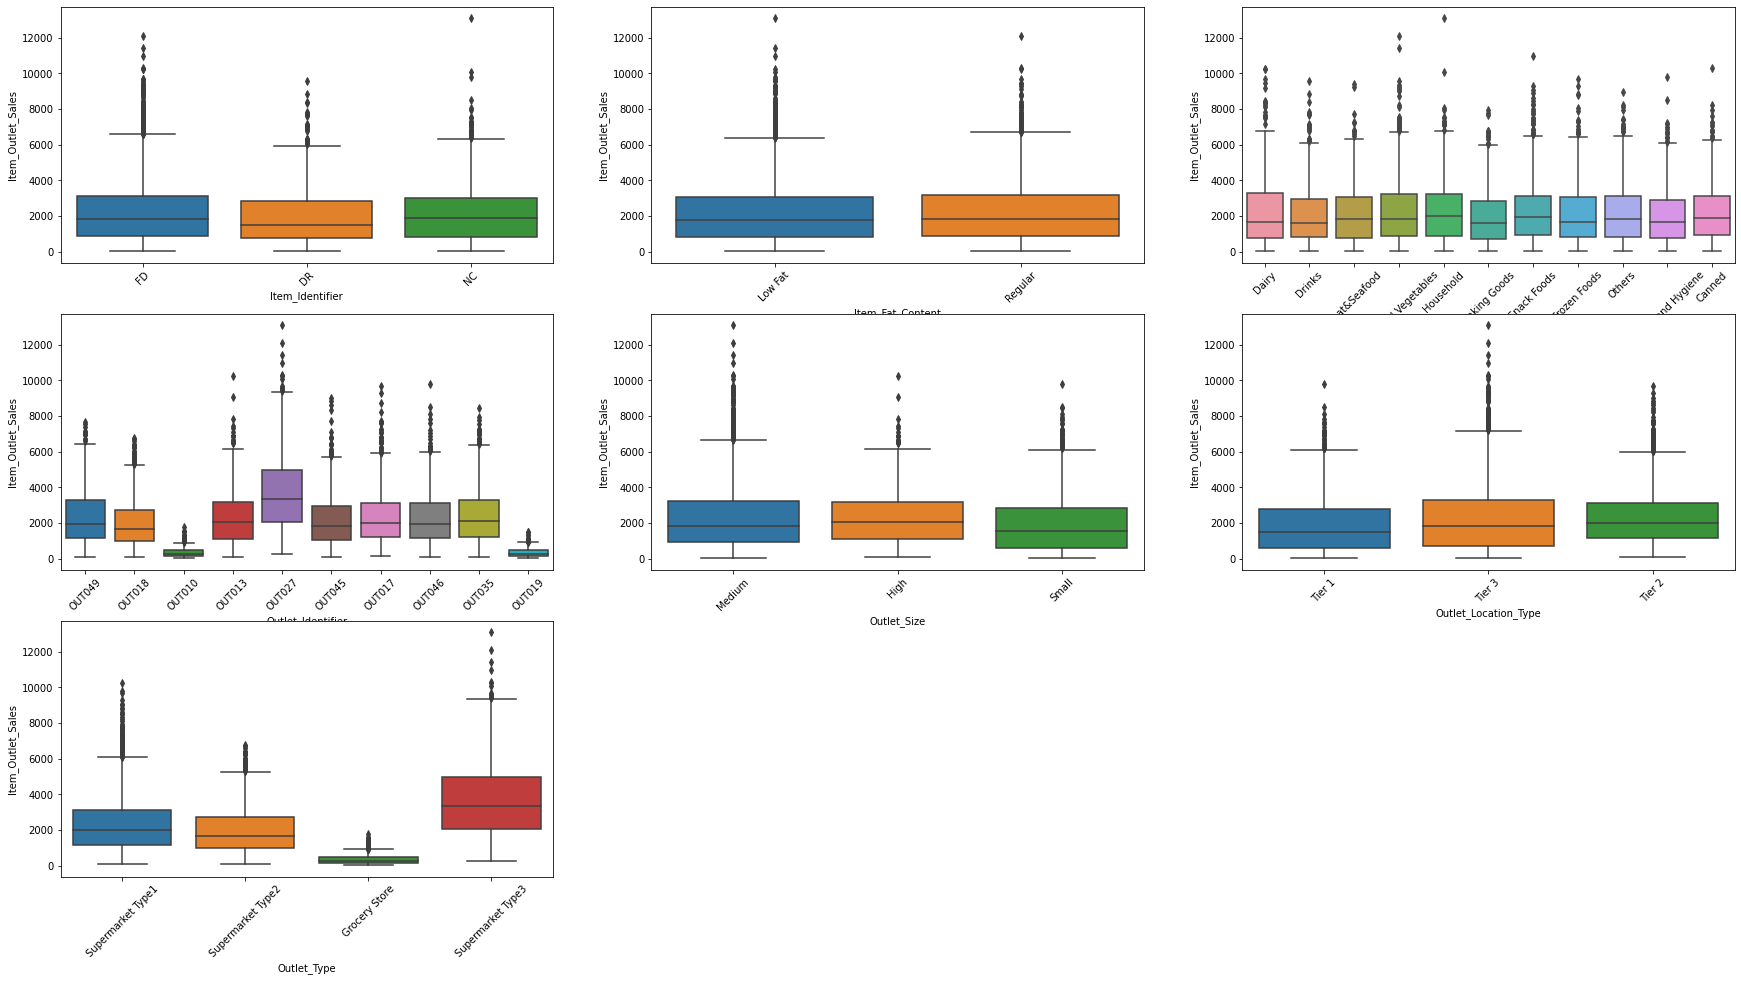

In [35]:
plt.figure(figsize=(30,16))
for i,name in enumerate(obj_cols):
  plt.subplot(3,3,i+1)
  sns.boxplot(name,'Item_Outlet_Sales',data=dataset)
  plt.xticks(rotation=45)

In [36]:
#Label Encoding of Outlet_Size and Outlet_Location_Type

dataset['Outlet_Size']=dataset['Outlet_Size'].map({'Small':0,'Medium':1,'High':2})
dataset['Outlet_Location_Type']=dataset['Outlet_Location_Type'].map({'Tier 3':0,'Tier 2':1,'Tier 1':2})



In [37]:
dataset['Outlet_Size'].value_counts()

1    5203
0    2388
2     932
Name: Outlet_Size, dtype: int64

In [38]:
dataset['Outlet_Location_Type'].value_counts()

0    3350
1    2785
2    2388
Name: Outlet_Location_Type, dtype: int64

In [39]:
#adding a new category to Item_Fat_Content- Non Durable for Items with Identifier NC(non consumable)

dataset['Item_Fat_Content']=np.where(dataset['Item_Identifier']=='NC','Non-Durable',dataset['Item_Fat_Content'])

In [40]:
dataset['Item_Fat_Content'].value_counts()

Low Fat        3918
Regular        3006
Non-Durable    1599
Name: Item_Fat_Content, dtype: int64

In [41]:
#One Hot encoding 

dataset_dum1=pd.get_dummies(dataset['Item_Fat_Content'],drop_first=True)

dataset_dum2=pd.get_dummies(dataset['Item_Type'],drop_first=True)

dataset_dum3=pd.get_dummies(dataset['Outlet_Identifier'],drop_first=True)

dataset_dum4=pd.get_dummies(dataset['Outlet_Type'],drop_first=True)
dataset_dum5=pd.get_dummies(dataset['Item_Identifier'],drop_first=True)

In [42]:
dataset_dum3.head()

,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0


In [43]:
dataset_new=pd.concat([dataset,dataset_dum1,dataset_dum2,dataset_dum3,dataset_dum4,dataset_dum5],axis=1,sort=False)

In [44]:
dataset_new.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age_of_company,Non-Durable,Regular,Canned,Dairy,Drinks,Frozen Foods,Fruits and Vegetables,Health and Hygiene,Household,Meat&Seafood,Others,Snack Foods,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049,Supermarket Type1,Supermarket Type2,Supermarket Type3,FD,NC
0,FD,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1,2,Supermarket Type1,3735.1380,21,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0
1,DR,5.92,Regular,0.019278,Drinks,48.2692,OUT018,1,0,Supermarket Type2,443.4228,11,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2,FD,17.50,Low Fat,0.016760,Meat&Seafood,141.6180,OUT049,1,2,Supermarket Type1,2097.2700,21,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0
3,FD,19.20,Regular,0.073719,Fruits and Vegetables,182.0950,OUT010,1,0,Grocery Store,732.3800,22,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,NC,8.93,Non-Durable,0.064963,Household,53.8614,OUT013,2,0,Supermarket Type1,994.7052,33,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1


In [45]:
dataset_new.drop(['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Type'],axis=1,inplace=True)

In [46]:
dataset_new.drop(['Item_Identifier'],axis=1,inplace=True)

In [47]:
dataset_new.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Age_of_company,Non-Durable,Regular,Canned,Dairy,Drinks,Frozen Foods,Fruits and Vegetables,Health and Hygiene,Household,Meat&Seafood,Others,Snack Foods,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049,Supermarket Type1,Supermarket Type2,Supermarket Type3,FD,NC
0,9.30,0.016047,249.8092,1,2,3735.1380,21,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0
1,5.92,0.019278,48.2692,1,0,443.4228,11,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2,17.50,0.016760,141.6180,1,2,2097.2700,21,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0
3,19.20,0.073719,182.0950,1,0,732.3800,22,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,8.93,0.064963,53.8614,2,0,994.7052,33,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1


In [48]:
#Binning of Age column
dataset_new['Age_of_company'].describe()

count    8523.000000
mean       22.168133
std         8.371760
min        11.000000
25%        16.000000
50%        21.000000
75%        33.000000
max        35.000000
Name: Age_of_company, dtype: float64

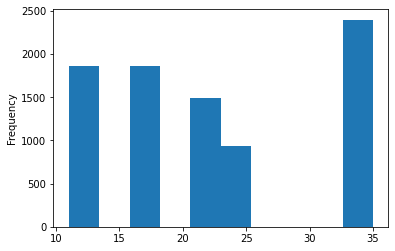

In [49]:
dataset_new['Age_of_company'].plot.hist()

In [50]:
#binning of age

bins=np.linspace(min(dataset_new['Age_of_company']),max(dataset_new['Age_of_company']),4)

In [51]:
bin_names=['novice','intermediate','established']

In [52]:
dataset_new['Age_binned']=pd.cut(dataset_new['Age_of_company'],bins,labels=bin_names,include_lowest=True)

In [53]:
dataset_new.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Age_of_company,Non-Durable,Regular,Canned,Dairy,Drinks,Frozen Foods,Fruits and Vegetables,Health and Hygiene,Household,Meat&Seafood,Others,Snack Foods,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049,Supermarket Type1,Supermarket Type2,Supermarket Type3,FD,NC,Age_binned
0,9.30,0.016047,249.8092,1,2,3735.1380,21,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,intermediate
1,5.92,0.019278,48.2692,1,0,443.4228,11,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,novice
2,17.50,0.016760,141.6180,1,2,2097.2700,21,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,intermediate
3,19.20,0.073719,182.0950,1,0,732.3800,22,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,intermediate
4,8.93,0.064963,53.8614,2,0,994.7052,33,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,established


In [54]:
#converting binned age to label encoding

dataset_new['Age_binned'].replace({'novice':0,'intermediate':1,'established':2},inplace=True)

In [55]:
dataset_new.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Age_of_company,Non-Durable,Regular,Canned,Dairy,Drinks,Frozen Foods,Fruits and Vegetables,Health and Hygiene,Household,Meat&Seafood,Others,Snack Foods,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049,Supermarket Type1,Supermarket Type2,Supermarket Type3,FD,NC,Age_binned
0,9.30,0.016047,249.8092,1,2,3735.1380,21,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1
1,5.92,0.019278,48.2692,1,0,443.4228,11,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,17.50,0.016760,141.6180,1,2,2097.2700,21,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1
3,19.20,0.073719,182.0950,1,0,732.3800,22,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
4,8.93,0.064963,53.8614,2,0,994.7052,33,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,2


In [124]:
#Linear Regression

x,y = dataset_new.drop(['Item_Outlet_Sales'],axis=1), dataset_new.Item_Outlet_Sales

In [125]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [126]:
#Normalization of continuous features
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()
X_train_minmax = mm_scaler.fit_transform(x_train)
mm_scaler.transform(x_test)

array([[0.96129801, 0.52305941, 0.6458693 , ..., 1.        , 0.        ,
        1.        ],
       [0.57130098, 0.10044385, 0.95502518, ..., 1.        , 0.        ,
        0.        ],
       [0.4889352 , 0.12596499, 0.68562318, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.50878238, 0.05441412, 0.36528795, ..., 1.        , 0.        ,
        1.        ],
       [0.3539744 , 0.35825074, 0.56343204, ..., 1.        , 0.        ,
        0.        ],
       [0.81542126, 0.20857015, 0.70244827, ..., 1.        , 0.        ,
        0.5       ]])

In [127]:
lr=LinearRegression()

In [128]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [129]:
lr_pred=lr.predict(x_test)

In [130]:
from sklearn.metrics import r2_score
r2_score(y_test,lr_pred)

0.5500854163937933